In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Basic setup of ou data

In [155]:
df = pd.read_csv('game_info.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474417 entries, 0 to 474416
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    474417 non-null  int64  
 1   slug                  474415 non-null  object 
 2   name                  474414 non-null  object 
 3   metacritic            4733 non-null    float64
 4   released              450218 non-null  object 
 5   tba                   474417 non-null  bool   
 6   updated               474417 non-null  object 
 7   website               65041 non-null   object 
 8   rating                474417 non-null  float64
 9   rating_top            474417 non-null  int64  
 10  playtime              474417 non-null  int64  
 11  achievements_count    474417 non-null  int64  
 12  ratings_count         474417 non-null  int64  
 13  suggestions_count     474417 non-null  int64  
 14  game_series_count     474417 non-null  int64  
 15  

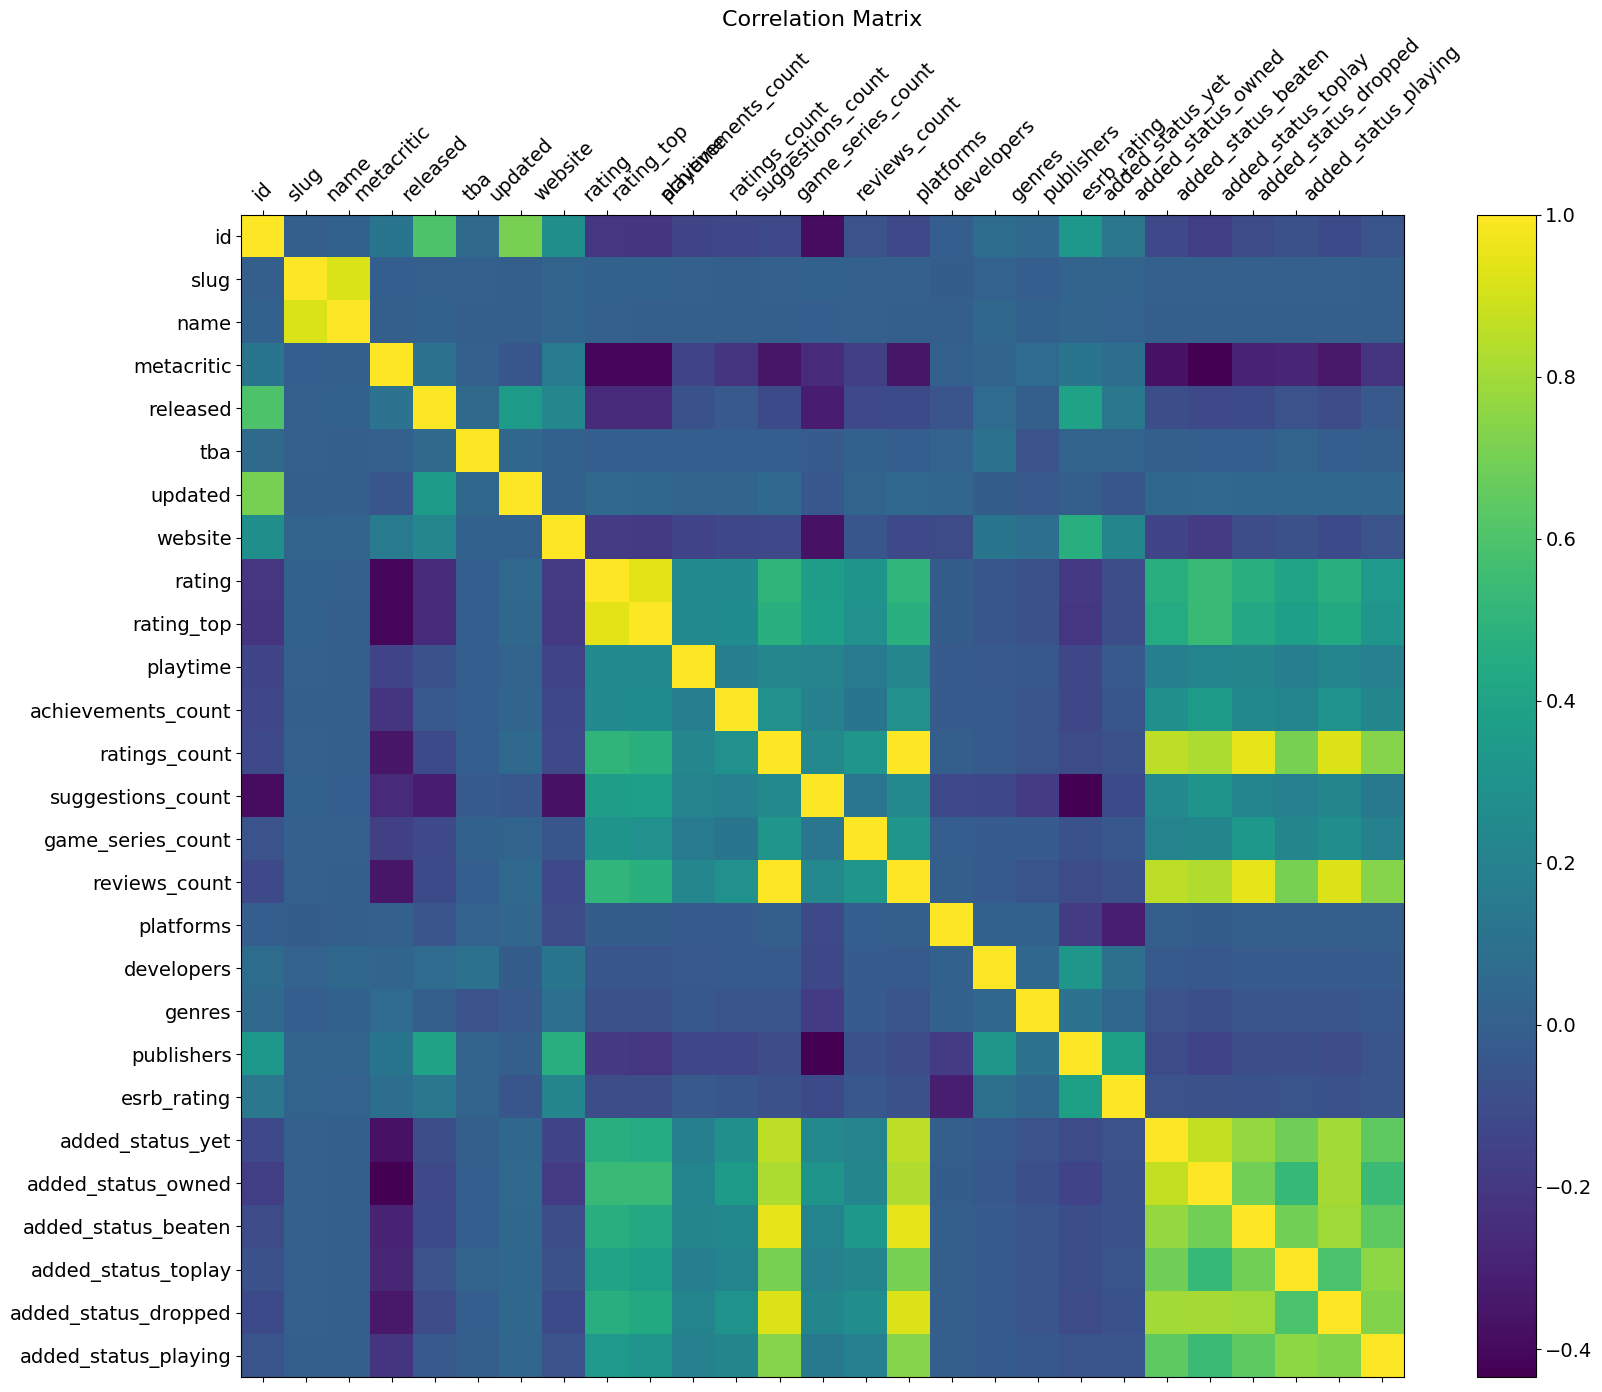

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
corr = df_encoded.corr()
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)

plt.xticks(range(df_encoded.shape[1]), df_encoded.columns, fontsize=14, rotation=45)
plt.yticks(range(df_encoded.shape[1]), df_encoded.columns, fontsize=14)

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16)

plt.show()


# Try to find correlations

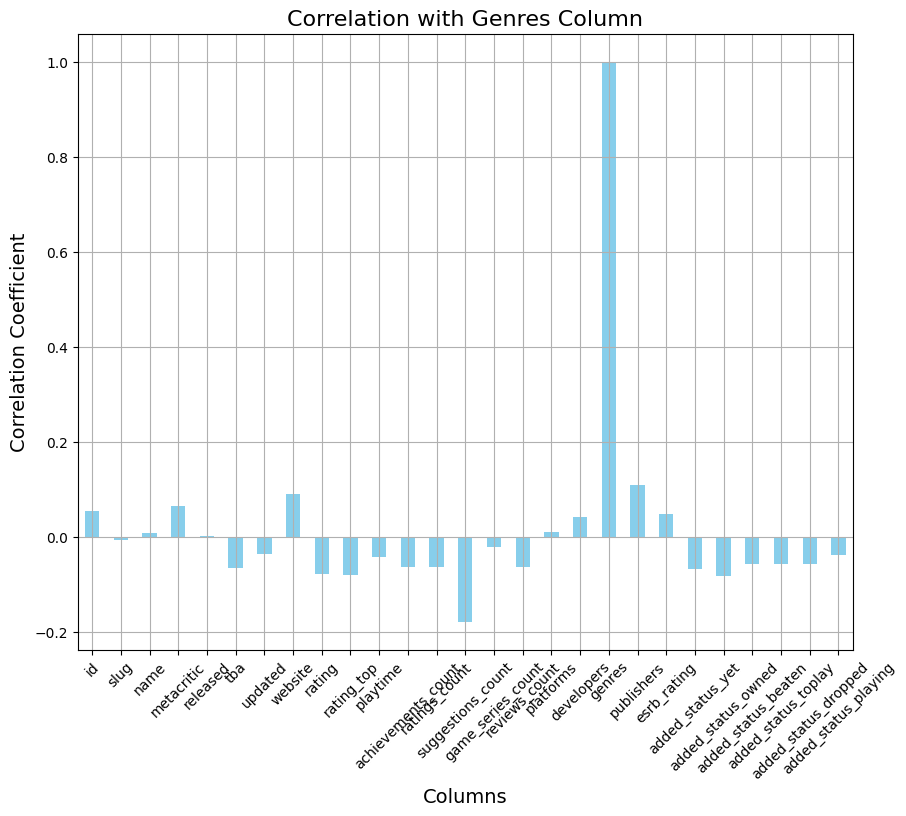

In [157]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Compute correlation with 'genres' column
corr = df_encoded.corr()['genres']

# Plotting
plt.figure(figsize=(10, 8))
corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Genres Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

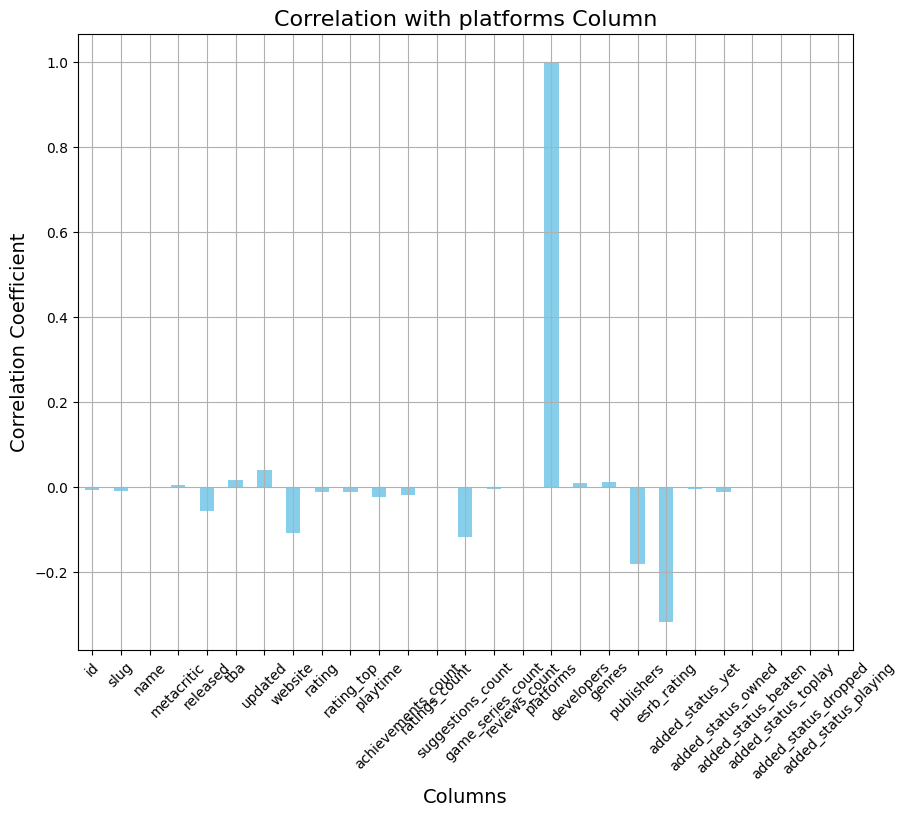

In [158]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

# Compute correlation with 'genres' column
corr = df_encoded.corr()['platforms']

# Plotting
plt.figure(figsize=(10, 8))
corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with platforms Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Filtering out anything where therer are no genres which will be our classes

In [159]:
print("length of our data: " + str(len(df)))
filtered_df  = df.dropna(subset=['genres'])
print("length of our data after droping empty genres: " + str(len(filtered_df)))

length of our data: 474417
length of our data after droping empty genres: 371232


# Count and separate the number of genres


In [160]:
filtered_df['genre_list'] = filtered_df.genres.apply(lambda x: x[:].split('||'))
filtered_df.head(10)

C:\Users\gydan\AppData\Local\Temp\ipykernel_10612\2300409244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genre_list'] = filtered_df.genres.apply(lambda x: x[:].split('||'))


,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genre_list
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0,"[Adventure, Puzzle]"
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0,"[Simulation, Indie]"
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0,"[Adventure, Arcade]"
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0,"[Action, Indie]"
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0,"[RPG, Strategy, Massively Multiplayer]"
6,100001,the-moon-sliver-itch,The Moon Sliver (itch),NaN,2014-05-03,False,2019-01-09T12:41:06,NaN,0.0,0,...,Adventure,NaN,NaN,0,0,0,0,0,0,[Adventure]
7,100002,red-entity,Red Entity,NaN,2014-08-26,False,2019-01-09T12:41:06,NaN,0.0,0,...,Action||Shooter,NaN,NaN,0,0,0,0,0,0,"[Action, Shooter]"
8,100004,hippiesvscops,HippiesVsCops,NaN,2016-04-18,False,2019-08-28T23:25:11,NaN,0.0,0,...,Strategy,NaN,NaN,0,0,0,0,0,0,[Strategy]
9,100005,they-came-through-the-floor,They Came Through the Floor,NaN,2018-06-24,False,2019-01-09T12:41:06,NaN,0.0,0,...,Platformer,NaN,NaN,0,0,0,0,0,0,[Platformer]
10,100006,fading-light-descent,Fading Light: Descent,NaN,2017-08-24,False,2019-01-09T12:41:06,NaN,0.0,0,...,Adventure,NaN,NaN,0,1,0,0,0,0,[Adventure]


In [161]:
exploded_df = filtered_df.explode('genre_list')

unique_genre_count = exploded_df['genre_list'].nunique()

print(exploded_df['genre_list'].unique())
print(f"Number of unique genres: {unique_genre_count}")

['Adventure' 'Puzzle' 'Simulation' 'Indie' 'Arcade' 'Action' 'RPG'
 'Strategy' 'Massively Multiplayer' 'Shooter' 'Platformer' 'Educational'
 'Casual' 'Racing' 'Sports' 'Fighting' 'Family' 'Board Games' 'Card']
Number of unique genres: 19


# Combine metacritic and rating into one value and clear out where neither exist


In [162]:
filtered_df = filtered_df.dropna(subset=['rating', 'metacritic'], how='all')
filtered_df['rating'].fillna(-1, inplace=True)
filtered_df['metacritic'].fillna(-1, inplace=True)

# Transform the scales to a common range
filtered_df['rating'] = filtered_df['rating'].apply(lambda x: (x - 1) * 2 if x >= 0 else x)
filtered_df['metacritic'] = filtered_df['metacritic'].apply(lambda x: x / 10 if x >= 0 else x)

# Calculate the average rating
filtered_df['avg_rating'] = (filtered_df['rating'] + filtered_df['metacritic']) / 2

# Clip the result to be between 0 and 10
filtered_df['avg_rating'] = np.clip(filtered_df['avg_rating'], 0, 10)
filtered_df = filtered_df[filtered_df['avg_rating'] != 0.0]
print(len(filtered_df))

12141


# Drop unecessary values

In [163]:
percent_missing = filtered_df.isna().sum() * 100 / len(filtered_df)
percent_missing

id                       0.000000
slug                     0.000000
name                     0.000000
metacritic               0.000000
released                 1.400214
tba                      0.000000
updated                  0.000000
website                 33.423935
rating                   0.000000
rating_top               0.000000
playtime                 0.000000
achievements_count       0.000000
ratings_count            0.000000
suggestions_count        0.000000
game_series_count        0.000000
reviews_count            0.000000
platforms                0.041183
developers               1.877934
genres                   0.000000
publishers               3.632320
esrb_rating             60.332757
added_status_yet         0.000000
added_status_owned       0.000000
added_status_beaten      0.000000
added_status_toplay      0.000000
added_status_dropped     0.000000
added_status_playing     0.000000
genre_list               0.000000
avg_rating               0.000000
dtype: float64

In [164]:
#filtered_df=filtered_df.drop(columns='esrb_rating') # Too many missing values has to be dropped otherwise it could highly disturb the dataset
filtered_df=filtered_df.drop(columns='website') # string unecessary
filtered_df=filtered_df.drop(columns='id') # string unecessary
filtered_df=filtered_df.drop(columns='tba') # string unecessary
filtered_df=filtered_df.drop(columns='slug') # string unecessary
filtered_df=filtered_df.drop(columns='genres') # these will be our labels they shouldn't also be in the training data
filtered_df=filtered_df.drop(columns='metacritic') # we have created a new combined rating from both rrating and metacritic
filtered_df=filtered_df.drop(columns='rating')# we have created a new combined rating from both rrating and metacritic
df_cleaned = filtered_df.dropna()
df_cleaned['publisher_list'] = df_cleaned.publishers.apply(lambda x: x.split('||')[0])
df_cleaned['platform_list'] = df_cleaned.platforms.apply(lambda x: x.split('||'))
df_cleaned['developer_list'] = df_cleaned.developers.apply(lambda x: x.split('||')[0])
df_cleaned=df_cleaned.drop(columns='publishers')
df_cleaned=df_cleaned.drop(columns='platforms')
df_cleaned=df_cleaned.drop(columns='developers')


C:\Users\gydan\AppData\Local\Temp\ipykernel_10612\1207162369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['publisher_list'] = df_cleaned.publishers.apply(lambda x: x.split('||')[0])
C:\Users\gydan\AppData\Local\Temp\ipykernel_10612\1207162369.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['platform_list'] = df_cleaned.platforms.apply(lambda x: x.split('||'))
C:\Users\gydan\AppData\Local\Temp\ipykernel_10612\1207162369.py:12: SettingWithCopyWarning: 
A value is trying to b

In [165]:
percent_missing = df_cleaned.isna().sum() * 100 / len(df_cleaned)
percent_missing

name                    0.0
released                0.0
updated                 0.0
rating_top              0.0
playtime                0.0
achievements_count      0.0
ratings_count           0.0
suggestions_count       0.0
game_series_count       0.0
reviews_count           0.0
esrb_rating             0.0
added_status_yet        0.0
added_status_owned      0.0
added_status_beaten     0.0
added_status_toplay     0.0
added_status_dropped    0.0
added_status_playing    0.0
genre_list              0.0
avg_rating              0.0
publisher_list          0.0
platform_list           0.0
developer_list          0.0
dtype: float64

In [166]:
print(len(df_cleaned))
df_cleaned.head(5)


4496


,name,released,updated,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,...,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genre_list,avg_rating,publisher_list,platform_list,developer_list
53,SEUM: Speedrunners from Hell,2016-07-27,2020-10-02T02:35:30,4,4,57,34,514,0,34,...,399,9,3,9,2,"[Action, Shooter, Adventure, Arcade, Indie]",2.24,Headup Games,"[macOS, PC, Linux, PlayStation 4, Xbox One]",Headup Games
85,Sudden Strike 4,2017-08-10,2019-10-22T14:21:49,4,2,121,32,546,4,33,...,603,3,6,13,4,"[Action, Strategy]",5.97,Kalypso Media,"[macOS, iOS, Linux, PC, PlayStation 4]",Kalypso Media
135,MXGP3 - The Official Motocross Videogame,2017-05-29,2019-10-31T23:52:39,3,3,109,18,567,0,18,...,100,2,1,6,0,"[Simulation, Sports, Racing]",1.28,Milestone,"[Xbox One, PC, Nintendo Switch, PlayStation 4]",Milestone
207,Arizona Sunshine,2016-12-06,2020-06-26T22:22:00,4,3,87,42,605,0,42,...,294,23,8,17,2,"[Action, Adventure, Indie]",6.81,Vertigo Games,"[PC, PlayStation 4]",Vertigo Games
359,HITMAN,2017-11-16,2019-11-29T18:09:04,4,7,188,1371,586,8,1375,...,5134,656,251,440,112,"[Action, Shooter]",7.07,Square Enix,"[Linux, macOS, PC, Xbox One, PlayStation 4]",Feral Interactive


In [167]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4496 entries, 53 to 474366
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  4496 non-null   object 
 1   released              4496 non-null   object 
 2   updated               4496 non-null   object 
 3   rating_top            4496 non-null   int64  
 4   playtime              4496 non-null   int64  
 5   achievements_count    4496 non-null   int64  
 6   ratings_count         4496 non-null   int64  
 7   suggestions_count     4496 non-null   int64  
 8   game_series_count     4496 non-null   int64  
 9   reviews_count         4496 non-null   int64  
 10  esrb_rating           4496 non-null   object 
 11  added_status_yet      4496 non-null   int64  
 12  added_status_owned    4496 non-null   int64  
 13  added_status_beaten   4496 non-null   int64  
 14  added_status_toplay   4496 non-null   int64  
 15  added_status_dropped  4

# cast time into a more managable format

In [168]:
df_cleaned['released'] = pd.to_datetime(df_cleaned['released']).astype(np.int64)
df_cleaned['updated'] = pd.to_datetime(df_cleaned['updated']).astype(np.int64)

In [169]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4496 entries, 53 to 474366
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  4496 non-null   object 
 1   released              4496 non-null   int64  
 2   updated               4496 non-null   int64  
 3   rating_top            4496 non-null   int64  
 4   playtime              4496 non-null   int64  
 5   achievements_count    4496 non-null   int64  
 6   ratings_count         4496 non-null   int64  
 7   suggestions_count     4496 non-null   int64  
 8   game_series_count     4496 non-null   int64  
 9   reviews_count         4496 non-null   int64  
 10  esrb_rating           4496 non-null   object 
 11  added_status_yet      4496 non-null   int64  
 12  added_status_owned    4496 non-null   int64  
 13  added_status_beaten   4496 non-null   int64  
 14  added_status_toplay   4496 non-null   int64  
 15  added_status_dropped  4

# One hot encode genre and platfom list since they are relativly small in number


In [170]:
exploded_genre_df = df_cleaned.explode('genre_list')
unique_genre_count = exploded_genre_df['genre_list'].nunique()

exploded_platform_df = df_cleaned.explode('platform_list')
unique_platform_count = exploded_platform_df['platform_list'].nunique()


print(exploded_genre_df['genre_list'].unique())
print(f"Number of unique genres: {unique_genre_count}")

print(exploded_platform_df['platform_list'].unique())
print(f"Number of unique platform: {unique_platform_count}")
"""

exploded_publisher_df = df_cleaned.explode('publisher_list')
unique_publisher_count = exploded_publisher_df['publisher_list'].nunique()

exploded_developer_df = df_cleaned.explode('developer_list')
unique_developer_count = exploded_developer_df['developer_list'].nunique()


print(exploded_publisher_df['publisher_list'].unique())
print(f"Number of unique publiser: {unique_publisher_count}")

print(exploded_developer_df['developer_list'].unique())
print(f"Number of unique developer: {unique_developer_count}")
"""

['Action' 'Shooter' 'Adventure' 'Arcade' 'Indie' 'Strategy' 'Simulation'
 'Sports' 'Racing' 'Casual' 'RPG' 'Platformer' 'Puzzle'
 'Massively Multiplayer' 'Board Games' 'Fighting' 'Educational' 'Family'
 'Card']
Number of unique genres: 19
['macOS' 'PC' 'Linux' 'PlayStation 4' 'Xbox One' 'iOS' 'Nintendo Switch'
 'PlayStation 3' 'Xbox 360' 'Xbox' 'PlayStation 2' 'Wii' 'PS Vita'
 'Android' 'Game Boy Advance' 'Classic Macintosh' 'Wii U' 'Nintendo 64'
 'Web' 'Nintendo 3DS' 'GameCube' 'Dreamcast' 'PSP' 'PlayStation'
 'Nintendo DS' '3DO' 'Genesis' 'Game Gear' 'SEGA Master System' 'SEGA CD'
 'Commodore / Amiga' 'Atari ST' 'Nintendo DSi' 'Game Boy Color' 'NES'
 'Game Boy' 'SEGA Saturn' 'SNES' 'Jaguar' 'Neo Geo' 'Atari 2600'
 'Atari 8-bit' 'Atari 5200' 'Apple II' 'Xbox Series S/X' 'PlayStation 5'
 'SEGA 32X']
Number of unique platform: 47


'\n\nexploded_publisher_df = df_cleaned.explode(\'publisher_list\')\nunique_publisher_count = exploded_publisher_df[\'publisher_list\'].nunique()\n\nexploded_developer_df = df_cleaned.explode(\'developer_list\')\nunique_developer_count = exploded_developer_df[\'developer_list\'].nunique()\n\n\nprint(exploded_publisher_df[\'publisher_list\'].unique())\nprint(f"Number of unique publiser: {unique_publisher_count}")\n\nprint(exploded_developer_df[\'developer_list\'].unique())\nprint(f"Number of unique developer: {unique_developer_count}")\n'

In [171]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres = pd.DataFrame(mlb.fit_transform(df_cleaned['genre_list']),columns=mlb.classes_, index=df_cleaned.index)
df_cleaned=df_cleaned.drop(columns='genre_list')

In [172]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
platforms = pd.DataFrame(mlb.fit_transform(df_cleaned['platform_list']),columns=mlb.classes_, index=df_cleaned.index)
df_cleaned=df_cleaned.drop(columns='platform_list')
platforms.head(5)


,3DO,Android,Apple II,Atari 2600,Atari 5200,Atari 8-bit,Atari ST,Classic Macintosh,Commodore / Amiga,Dreamcast,...,SNES,Web,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series S/X,iOS,macOS
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [173]:
esrb_rating=pd.get_dummies(df_cleaned['esrb_rating'])
df_cleaned=df_cleaned.drop(columns='esrb_rating')
esrb_rating=esrb_rating.astype('Int64')
esrb_rating.head(10)

,Adults Only,Everyone,Everyone 10+,Mature,Rating Pending,Teen
53,0,0,0,0,0,1
85,0,0,0,1,0,0
135,0,0,1,0,0,0
207,1,0,0,0,0,0
359,1,0,0,0,0,0
446,0,0,0,1,0,0
510,0,0,0,1,0,0
522,0,0,0,1,0,0
638,0,0,0,1,0,0
658,0,0,0,0,0,1


# Encode studios and publisher

In [174]:
from sklearn.preprocessing import LabelEncoder
le_pub = LabelEncoder()
df_cleaned['publisher_list']=le_pub.fit_transform(df_cleaned['publisher_list'])

le_dev = LabelEncoder()
df_cleaned['developer_list']=le_dev.fit_transform(df_cleaned['developer_list'])

# Normalize

In [175]:
df_cleaned_norm=df_cleaned;
#df_cleaned_norm=df_cleaned_norm.drop(columns='released');
df_cleaned_norm=df_cleaned_norm.drop(columns='name');
df_cleaned_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4496 entries, 53 to 474366
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released              4496 non-null   int64  
 1   updated               4496 non-null   int64  
 2   rating_top            4496 non-null   int64  
 3   playtime              4496 non-null   int64  
 4   achievements_count    4496 non-null   int64  
 5   ratings_count         4496 non-null   int64  
 6   suggestions_count     4496 non-null   int64  
 7   game_series_count     4496 non-null   int64  
 8   reviews_count         4496 non-null   int64  
 9   added_status_yet      4496 non-null   int64  
 10  added_status_owned    4496 non-null   int64  
 11  added_status_beaten   4496 non-null   int64  
 12  added_status_toplay   4496 non-null   int64  
 13  added_status_dropped  4496 non-null   int64  
 14  added_status_playing  4496 non-null   int64  
 15  avg_rating            4

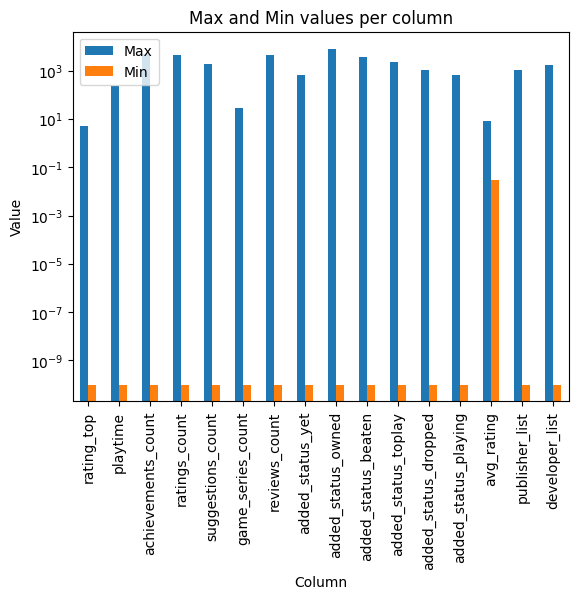

In [176]:
import matplotlib.pyplot as plt
import numpy as np

max_values = df_cleaned_norm.drop(columns=['released','updated']).max() # otherwise the erleased would be the only value observable
min_values = df_cleaned_norm.drop(columns=['released','updated']).min()

min_values += 1e-10 # so that we can see it even if it's zero

df_viz = pd.DataFrame({'Max': max_values, 'Min': min_values})

df_viz.plot(kind='bar')

plt.title('Max and Min values per column')
plt.xlabel('Column')
# min values can bee seen 
plt.yscale('log')
plt.ylabel('Value')

plt.show()


In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_cleaned_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned_norm), columns=df_cleaned_norm.columns, index=df_cleaned_norm.index)


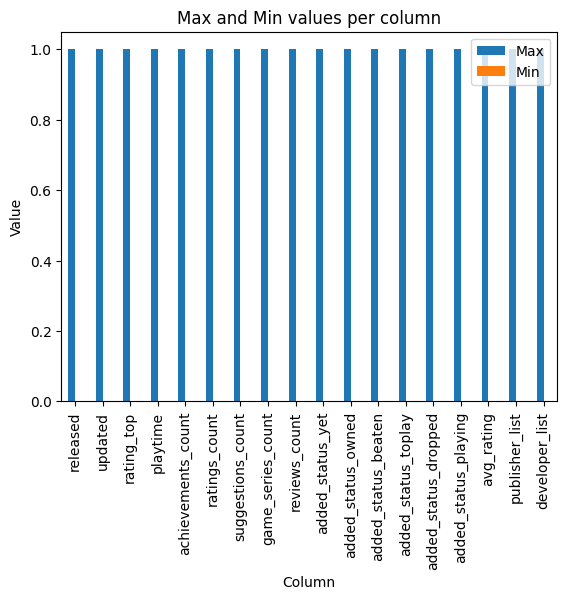

In [178]:
#Calculate the maximum and minimum of each column
max_values = df_cleaned_scaled.max()
min_values = df_cleaned_scaled.min()
min_values += 1e-10 # so that we can see it even if it's zero
# Create a new DataFrame for the visualization
df_viz = pd.DataFrame({'Max': max_values, 'Min': min_values})

# Plot the DataFrame
df_viz.plot(kind='bar')

# Set the title and labels
plt.title('Max and Min values per column')
plt.xlabel('Column')
plt.ylabel('Value')

# Show the plot
plt.show()

In [179]:
df_cleaned_scaled.head(10)

,released,updated,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,avg_rating,publisher_list,developer_list
53,0.892122,0.885251,0.8,0.016736,0.011731,0.007927,0.279500,0.000000,0.007845,0.048819,0.048084,0.002547,0.001290,0.008523,0.003106,0.259086,0.369014,0.362644
85,0.917707,0.400969,0.8,0.008368,0.024902,0.007461,0.296900,0.142857,0.007614,0.100787,0.072668,0.000849,0.002581,0.012311,0.006211,0.696366,0.444131,0.443299
135,0.912779,0.414139,0.6,0.012552,0.022433,0.004197,0.308320,0.000000,0.004153,0.006299,0.012051,0.000566,0.000430,0.005682,0.000000,0.146542,0.538028,0.533657
207,0.901033,0.749044,0.8,0.012552,0.017905,0.009792,0.328983,0.000000,0.009691,0.020472,0.035430,0.006510,0.003441,0.016098,0.003106,0.794842,0.917371,0.922377
359,0.924323,0.454452,0.8,0.029289,0.038691,0.319655,0.318651,0.285714,0.317259,0.839370,0.618703,0.185678,0.107957,0.416667,0.173913,0.825322,0.794366,0.285628
446,0.909066,0.864430,1.0,0.004184,0.005763,0.001399,0.259380,0.000000,0.001384,0.015748,0.012654,0.000566,0.000430,0.003788,0.000000,0.250879,0.215023,0.185567
510,0.505367,0.351271,0.8,0.004184,0.000000,0.085568,0.292007,0.285714,0.084679,0.182677,0.233912,0.084914,0.009462,0.107955,0.013975,0.760844,0.794366,0.389327
522,0.456693,0.351275,1.0,0.004184,0.000000,0.040336,0.259924,0.000000,0.039917,0.240945,0.241142,0.022927,0.013333,0.052083,0.018634,0.902696,0.794366,0.485143
638,0.900493,0.688290,0.8,0.071130,0.022021,0.243413,0.321914,0.071429,0.242732,0.450394,0.304411,0.210020,0.080430,0.292614,0.178571,0.793669,0.899531,0.899939
658,0.912037,0.693198,0.8,0.016736,0.016053,0.003497,0.205003,0.000000,0.003461,0.018898,0.008556,0.001981,0.003441,0.005682,0.006211,0.781946,0.931455,0.936325


# Correlation

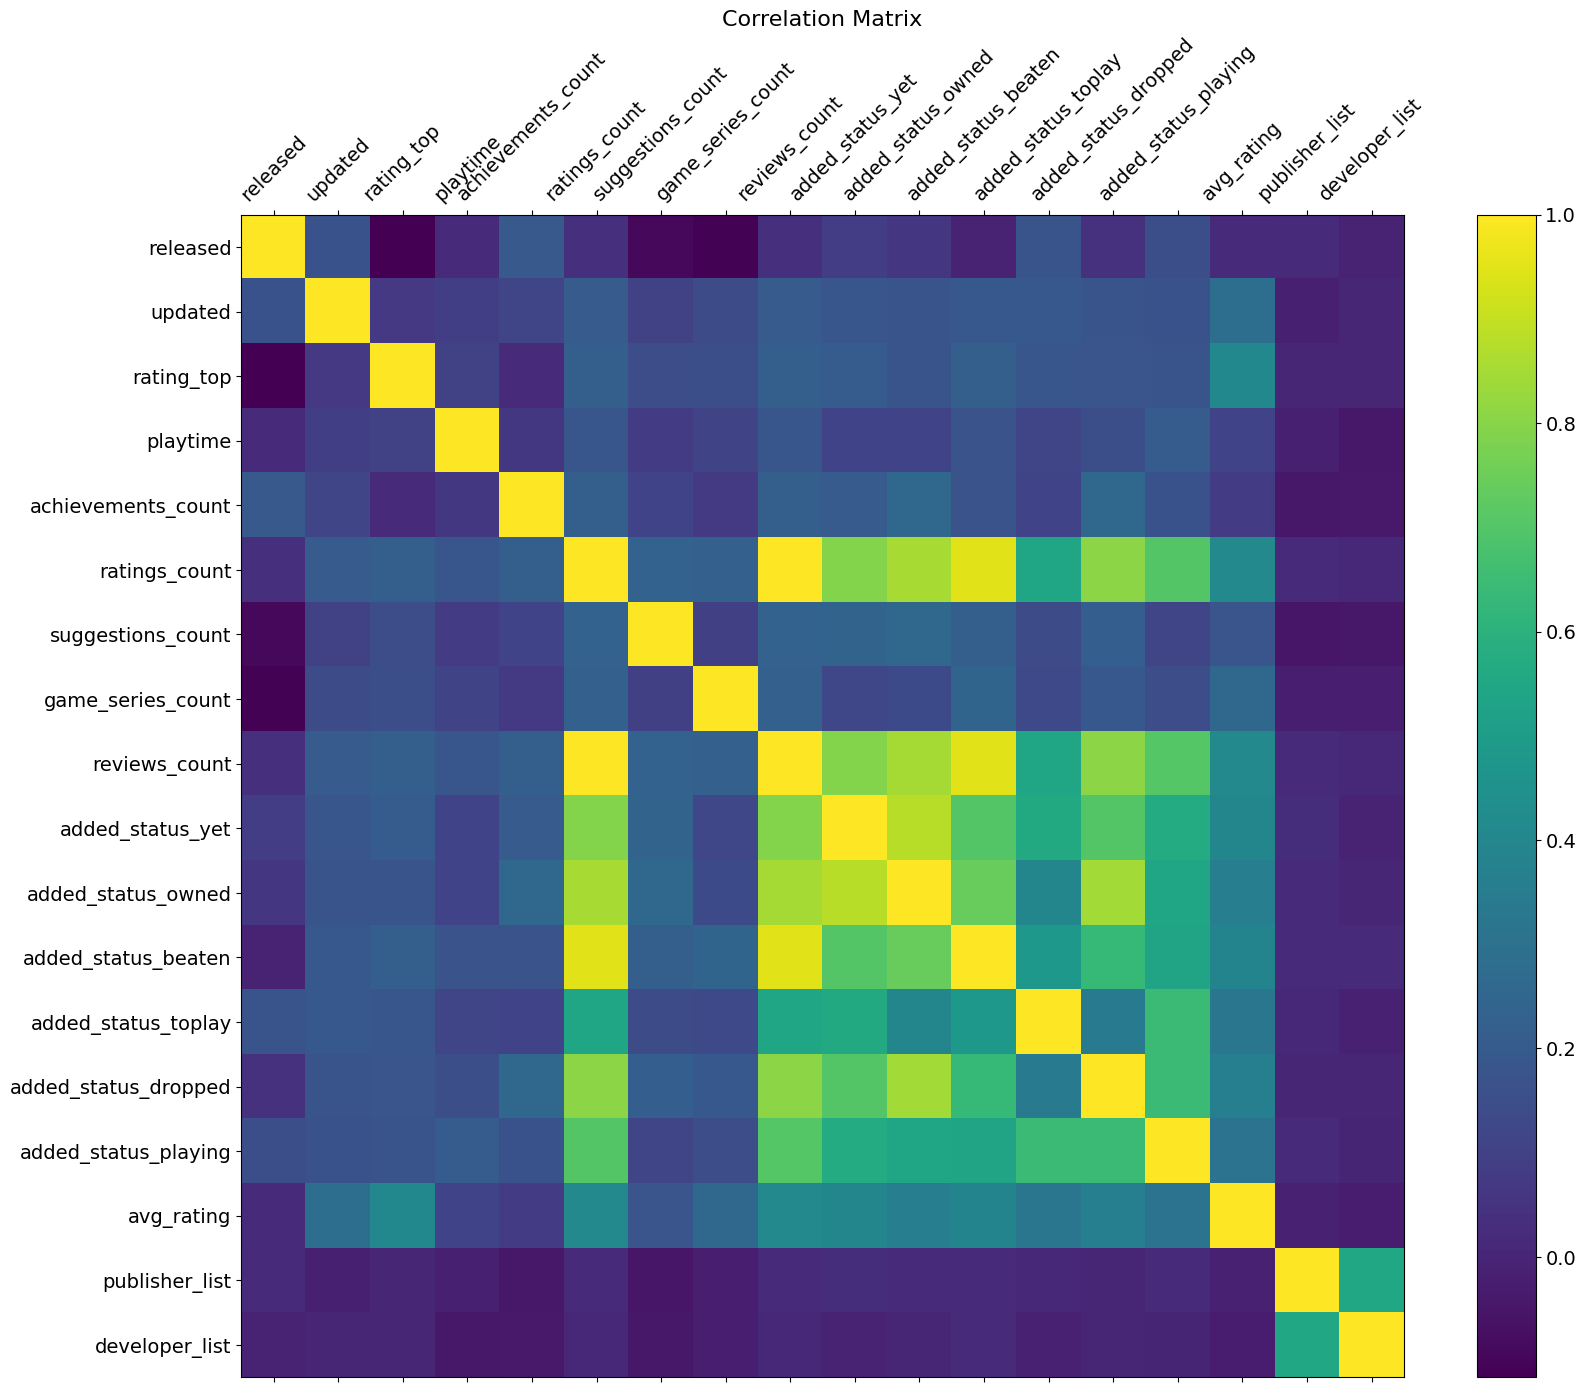

In [180]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_cleaned_scaled.corr(), fignum=f.number)
plt.xticks(range(df_cleaned_scaled.shape[1]), df_cleaned_scaled.columns, fontsize=14,rotation=45)
plt.yticks(range(df_cleaned_scaled.shape[1]), df_cleaned_scaled.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Append one hot encoded back to table


In [181]:
df_cleaned_scaled_without_platforms = df_cleaned_scaled
df_cleaned_scaled = pd.concat([df_cleaned_scaled, platforms],axis='columns', sort=False)

In [182]:
df_cleaned_scaled.head(5)

,released,updated,rating_top,playtime,achievements_count,ratings_count,suggestions_count,game_series_count,reviews_count,added_status_yet,...,SNES,Web,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series S/X,iOS,macOS
53,0.892122,0.885251,0.8,0.016736,0.011731,0.007927,0.279500,0.000000,0.007845,0.048819,...,0,0,0,0,0,0,1,0,0,1
85,0.917707,0.400969,0.8,0.008368,0.024902,0.007461,0.296900,0.142857,0.007614,0.100787,...,0,0,0,0,0,0,0,0,1,1
135,0.912779,0.414139,0.6,0.012552,0.022433,0.004197,0.308320,0.000000,0.004153,0.006299,...,0,0,0,0,0,0,1,0,0,0
207,0.901033,0.749044,0.8,0.012552,0.017905,0.009792,0.328983,0.000000,0.009691,0.020472,...,0,0,0,0,0,0,0,0,0,0
359,0.924323,0.454452,0.8,0.029289,0.038691,0.319655,0.318651,0.285714,0.317259,0.839370,...,0,0,0,0,0,0,1,0,0,1


In [183]:
df_cleaned_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4496 entries, 53 to 474366
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released              4496 non-null   float64
 1   updated               4496 non-null   float64
 2   rating_top            4496 non-null   float64
 3   playtime              4496 non-null   float64
 4   achievements_count    4496 non-null   float64
 5   ratings_count         4496 non-null   float64
 6   suggestions_count     4496 non-null   float64
 7   game_series_count     4496 non-null   float64
 8   reviews_count         4496 non-null   float64
 9   added_status_yet      4496 non-null   float64
 10  added_status_owned    4496 non-null   float64
 11  added_status_beaten   4496 non-null   float64
 12  added_status_toplay   4496 non-null   float64
 13  added_status_dropped  4496 non-null   float64
 14  added_status_playing  4496 non-null   float64
 15  avg_rating            4

# Correlation

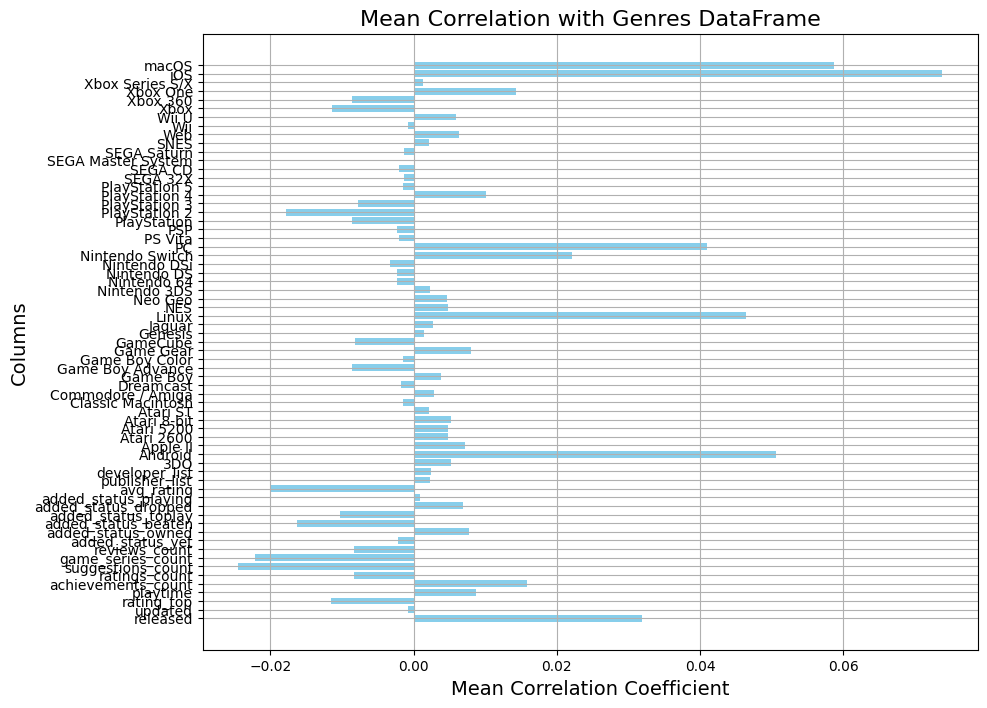

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Concatenate the dataframes
df_corr = pd.concat([df_cleaned_scaled, genres], axis='columns', sort=False)

# Compute correlation with each column in df_cleaned_scaled
correlations = {}
for col in df_cleaned_scaled.columns:
    correlations[col] = df_corr[[col]+list(genres.columns)].corr()[col].iloc[1:].mean()

# Convert the dictionary to a DataFrame
corr_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Mean Correlation'])

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(corr_df['Column'], corr_df['Mean Correlation'], color='skyblue')
plt.title('Mean Correlation with Genres DataFrame', fontsize=16)
plt.xlabel('Mean Correlation Coefficient', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.grid(True)
plt.show()


# Train model

In [185]:
from sklearn.model_selection import train_test_split
X = df_cleaned_scaled
y = genres
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [187]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#hidden_layer_sizes=(150,100,50,25,10,5), max_iter=300,activation = 'relu',solver='adam',random_state=1

model= MLPClassifier()
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)


cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

print(metrics.classification_report(expected_y, predicted_y))
print(cm)

Accuracy of MLPClassifier :  0.5266666666666666
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       495
           1       0.56      0.37      0.44       328
           2       0.50      0.14      0.22       107
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         7
           5       0.60      0.18      0.28       100
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        23
           8       1.00      0.03      0.05        37
           9       0.76      0.75      0.75       223
          10       0.33      0.04      0.07        24
          11       0.60      0.05      0.09        62
          12       0.33      0.06      0.10        67
          13       0.53      0.06      0.11       162
          14       0.00      0.00      0.00        47
          15       0.75      0.15      0.25       118
          16       0.33      0.04

c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# plot accuracy

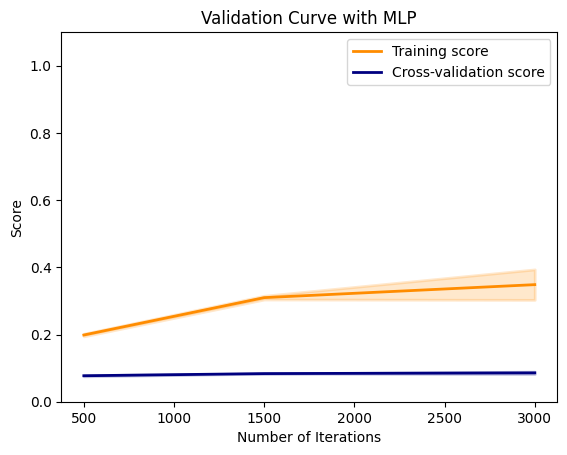

In [188]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np



# Define the parameter range (this could be any hyperparameter, not only 'max_iter')
param_range = [500,1500,3000]

# Calculate the validation curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="max_iter", param_range=param_range,
    cv=2, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve with MLP")
plt.xlabel("Number of Iterations")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [189]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")


MAE: 0.1053


In [190]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")


MSE: 0.1053


In [191]:
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score:.4f}")


R-squared: 0.0822


In [192]:
print(model.predict(X_test[:]))
print(y_test[:10])

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]
        Action  Adventure  Arcade  Board Games  Card  Casual  Educational  \
13970        1          0       0            0     0       0            0   
183251       0          0       0            0     0       0            0   
65117        0          1       0            0     0       0            0   
149581       0          1       0            0     0       0            0   
416340       1          1       1            0     0       0            0   
321955       1          0       0            0     0       0            0   
468887       0          0       0            0     0       1            1   
135209       1          0       0            0     0       0            0   
316334       1          1       1            0     0       0            0   
246438       1          0       0            0     0       0            0   

        Family  Fighting  Indie 

# Try to optimize hyper parameters

## Gridseach


### Try increasing iteration

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('mlp', MLPClassifier())])

params = [{'mlp__alpha': [0.0001,0.001,0.005, 0.05],
           'mlp__max_iter':[500,750,1500,3000,4000,5000,7200],
           }]

gs_mlp = GridSearchCV(mlp_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_params_)

# find best model score
print(gs_mlp.score(X_train, y_train))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('mlp', MLPClassifier(alpha=0.0001,max_iter=4000))])

params = [{#'mlp__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
           'mlp__activation': ['tanh', 'relu'],
           'mlp__solver': ['sgd', 'adam'],
           #'mlp__alpha': [0.0001,0.001,0.005, 0.05],
           'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
           }]

gs_mlp = GridSearchCV(mlp_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_params_)

# find best model score
print(gs_mlp.score(X_train, y_train))

{'mlp__activation': 'relu', 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}
0.10736263736263736


c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('mlp', MLPClassifier(alpha=0.0001,max_iter=4000,activation='relu',learning_rate='adaptive',solver='adam'))])

params = [{'mlp__hidden_layer_sizes': [(50,50,50,20), (50,100,50), (100,),(1000,500,250,125,70,20)],
           }]

gs_mlp = GridSearchCV(mlp_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)

gs_mlp.fit(X_train, y_train)

print(gs_mlp.best_params_)

# find best model score
print(gs_mlp.score(X_train, y_train))

{'mlp__hidden_layer_sizes': (1000, 500, 250, 125, 70, 20)}
0.7465934065934066


## Randomized search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

def hyperparameter_tune(clf, parameters, iterations, X, y):
  randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=5) 
  randomSearch.fit(X,y)
  params = randomSearch.best_params_
  score = randomSearch.best_score_
  return params, score


params = {'hidden_layer_sizes': [(50),(50,50,50), (50,100,50), (100,),(500,50,),(1000,100,10,18),(150,50,150,50,20),(30,30,30,30,30),(1000,500,250,125,70,20),(30,30,30,)],
           'activation': ['tanh', 'relu','logistic','identity'],
           'solver': ['sgd', 'adam'],
           'alpha': [0.0001,0.001,0.005, 0.05,0.1,0.5,0.8],
           'learning_rate': ['invscaling','constant', 'adaptive'],
           'max_iter':[50,200,500,1000,2000,5000,10000,20000,40000],
           }

clf = MLPClassifier(verbose=True, early_stopping=True)


parameters_after_tuning, score_after_tuning = hyperparameter_tune(clf, params, 10, X_train, y_train);
print("parameters after tunning:")
print(parameters_after_tuning)
print("scores after tunning:")
print(score_after_tuning)

Iteration 1, loss = 10.80527568
Validation score: 0.000000
Iteration 2, loss = 7.26618879
Validation score: 0.000000
Iteration 3, loss = 6.25424933
Validation score: 0.000000
Iteration 4, loss = 5.98636241
Validation score: 0.064835
Iteration 5, loss = 5.88970987
Validation score: 0.064835
Iteration 6, loss = 5.84508415
Validation score: 0.000000
Iteration 7, loss = 5.82089014
Validation score: 0.064835
Iteration 8, loss = 5.80590555
Validation score: 0.000000
Iteration 9, loss = 5.79628669
Validation score: 0.000000
Iteration 10, loss = 5.78959005
Validation score: 0.000000
Iteration 11, loss = 5.78455020
Validation score: 0.064835
Iteration 12, loss = 5.78093830
Validation score: 0.000000
Iteration 13, loss = 5.77819859
Validation score: 0.000000
Iteration 14, loss = 5.77592253
Validation score: 0.000000
Iteration 15, loss = 5.77422205
Validation score: 0.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iterat

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

model= MLPClassifier(solver='adam',max_iter=20000,learning_rate='adaptive',hidden_layer_sizes=(150, 50, 150, 50, 20),alpha=0.005,activation='relu')
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)


cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

print(metrics.classification_report(expected_y, predicted_y))
print(cm)

Accuracy of MLPClassifier :  0.4178383128295255
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      1101
           1       0.52      0.49      0.51       775
           2       0.41      0.26      0.32       226
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        14
           5       0.47      0.32      0.38       317
           6       0.33      0.07      0.11        15
           7       0.20      0.17      0.18        41
           8       0.26      0.24      0.25        80
           9       0.76      0.81      0.78       813
          10       0.37      0.11      0.17        61
          11       0.22      0.11      0.14       112
          12       0.23      0.17      0.19       149
          13       0.40      0.28      0.33       437
          14       0.23      0.10      0.14       136
          15       0.35      0.29      0.32       207
          16       0.28      0.10

c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of  :  0.5277777777777778


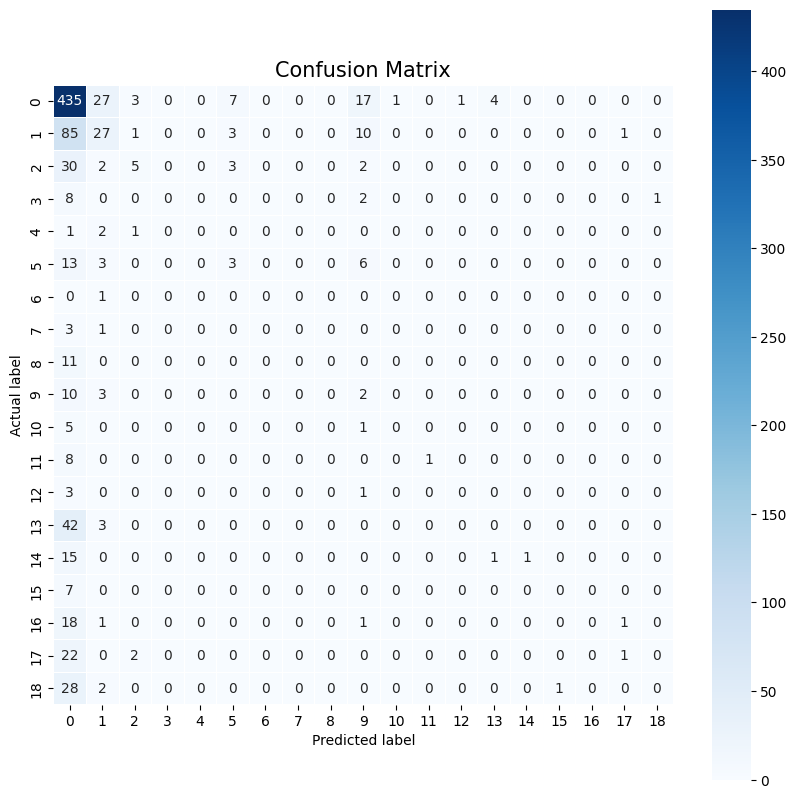

 clf score : 0.07888888888888888


In [ ]:
import seaborn as sns
predicted_y = model.predict(X_test)
cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))
#Printing the accuracy
print("Accuracy of  : ", accuracy(cm))

# Create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

#print(metrics.classification_report(expected_y, predicted_y))
#print(cm)
score = model.score(X_test, y_test)
print(" clf score : "+str(score))

In [ ]:
print(genres.sum())

Action                   2545
Adventure                1586
Arcade                    517
Board Games                51
Card                       40
Casual                    490
Educational                25
Family                    112
Fighting                  179
Indie                    1127
Massively Multiplayer      91
Platformer                266
Puzzle                    364
RPG                       853
Racing                    261
Shooter                   604
Simulation                476
Sports                    311
Strategy                  679
dtype: int64


# Test classifiers

Accuracy of Nearest Neighbors :  0.437609841827768


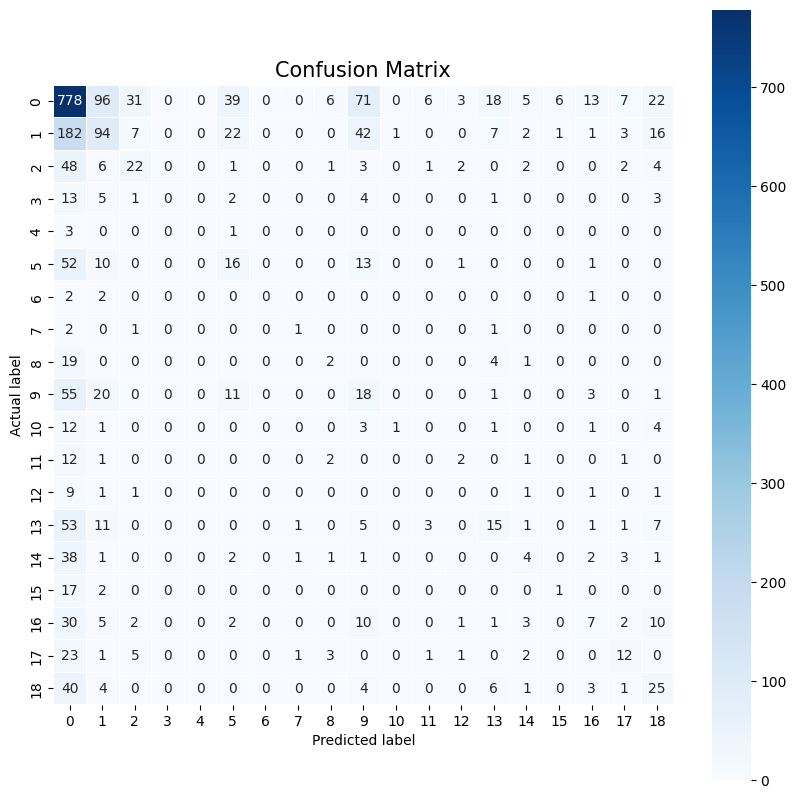

Nearest Neighbors clf score : 0.1023725834797891
Accuracy of Decision Tree :  0.45123022847100175


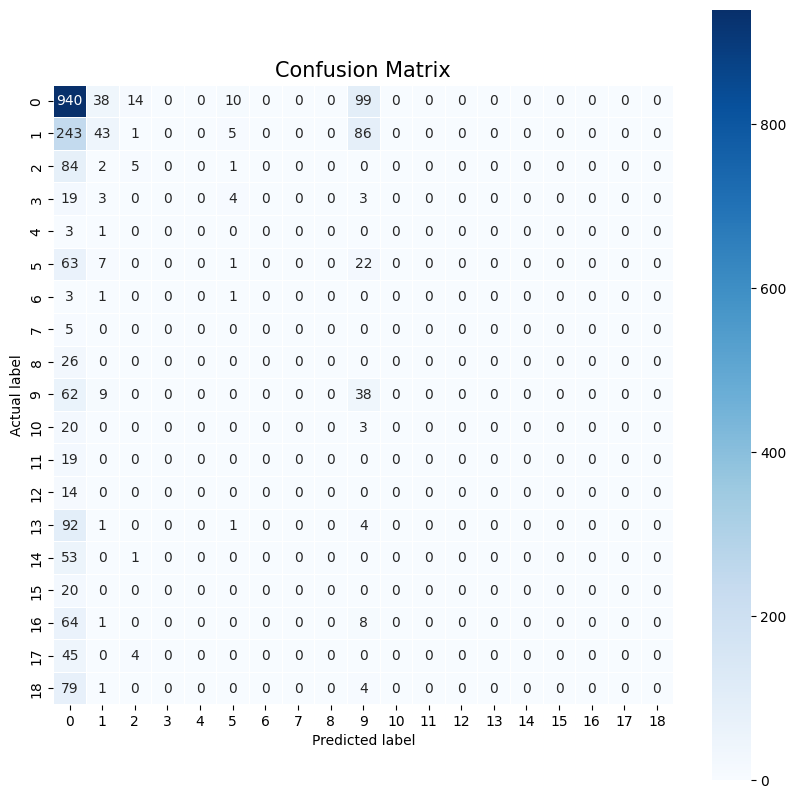

Decision Tree clf score : 0.04437609841827768
Accuracy of Random Forest :  0.4780316344463972


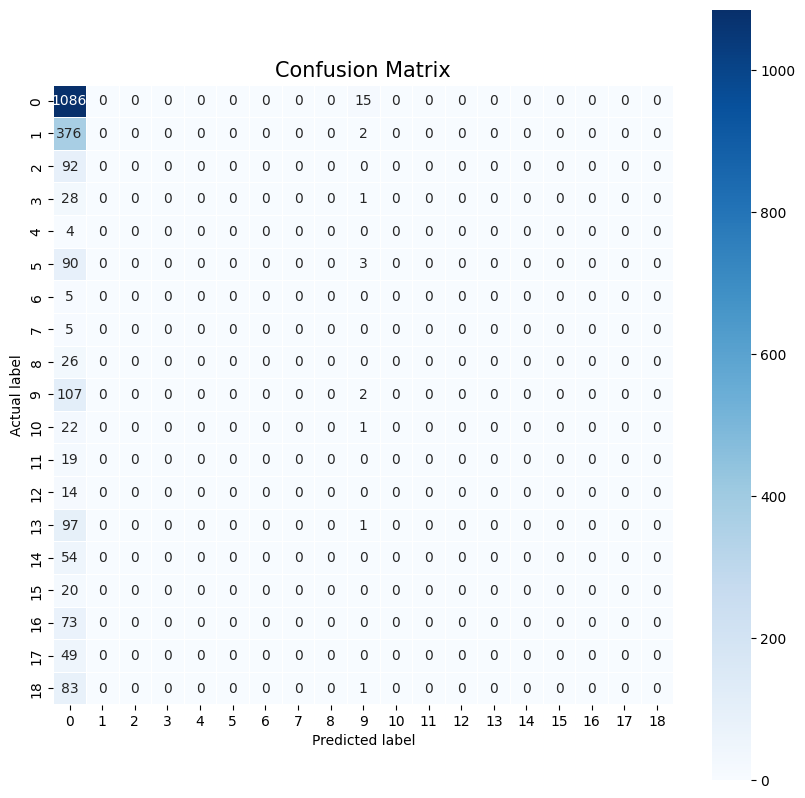

Random Forest clf score : 0.023725834797891036
Accuracy of Neural Net :  0.4710017574692443


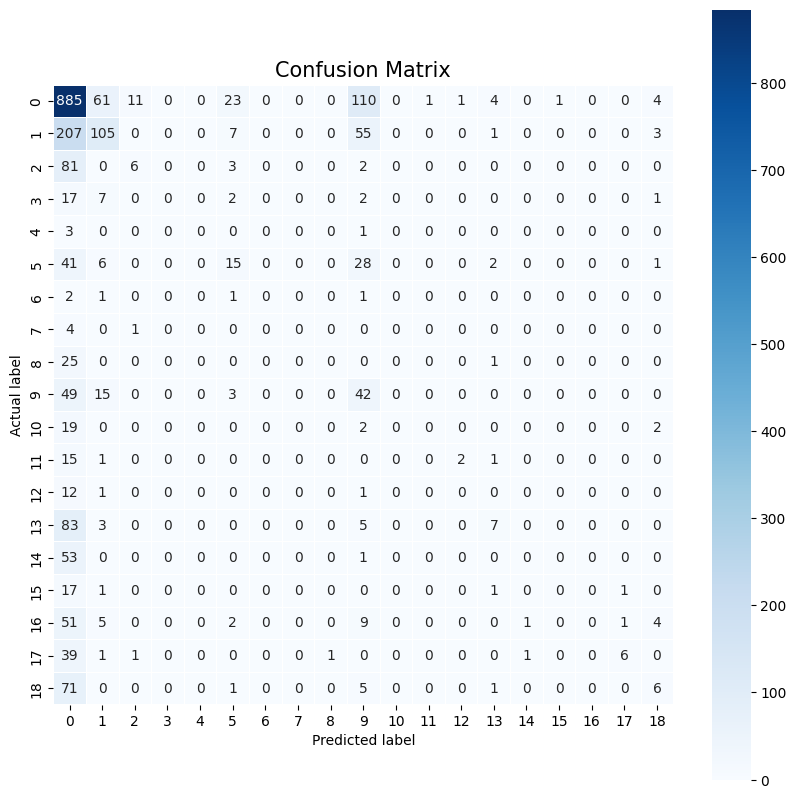

Neural Net clf score : 0.08567662565905097


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
]

X = df_cleaned_scaled
y = genres
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    expected_y  = y_test
    predicted_y = clf.predict(X_test)
    cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))
    #Printing the accuracy
    print("Accuracy of "+name+" : ", accuracy(cm))

    # Create a heatmap
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix', size = 15)
    plt.show()

    #print(metrics.classification_report(expected_y, predicted_y))
    #print(cm)
    score = clf.score(X_test, y_test)
    print(name +" clf score : "+str(score))


# Try with better corelation

In [ ]:

df_wiht_genres = pd.concat([df_cleaned_scaled, genres],axis='columns', sort=False)
#df_cleaned_scaled = pd.concat([df_cleaned_scaled, platforms],axis='columns', sort=False)
for asd in df_cleaned_scaled_without_platforms.columns :
    print(asd)

released
updated
rating_top
playtime
achievements_count
ratings_count
suggestions_count
game_series_count
reviews_count
added_status_yet
added_status_owned
added_status_beaten
added_status_toplay
added_status_dropped
added_status_playing
avg_rating
publisher_list
developer_list


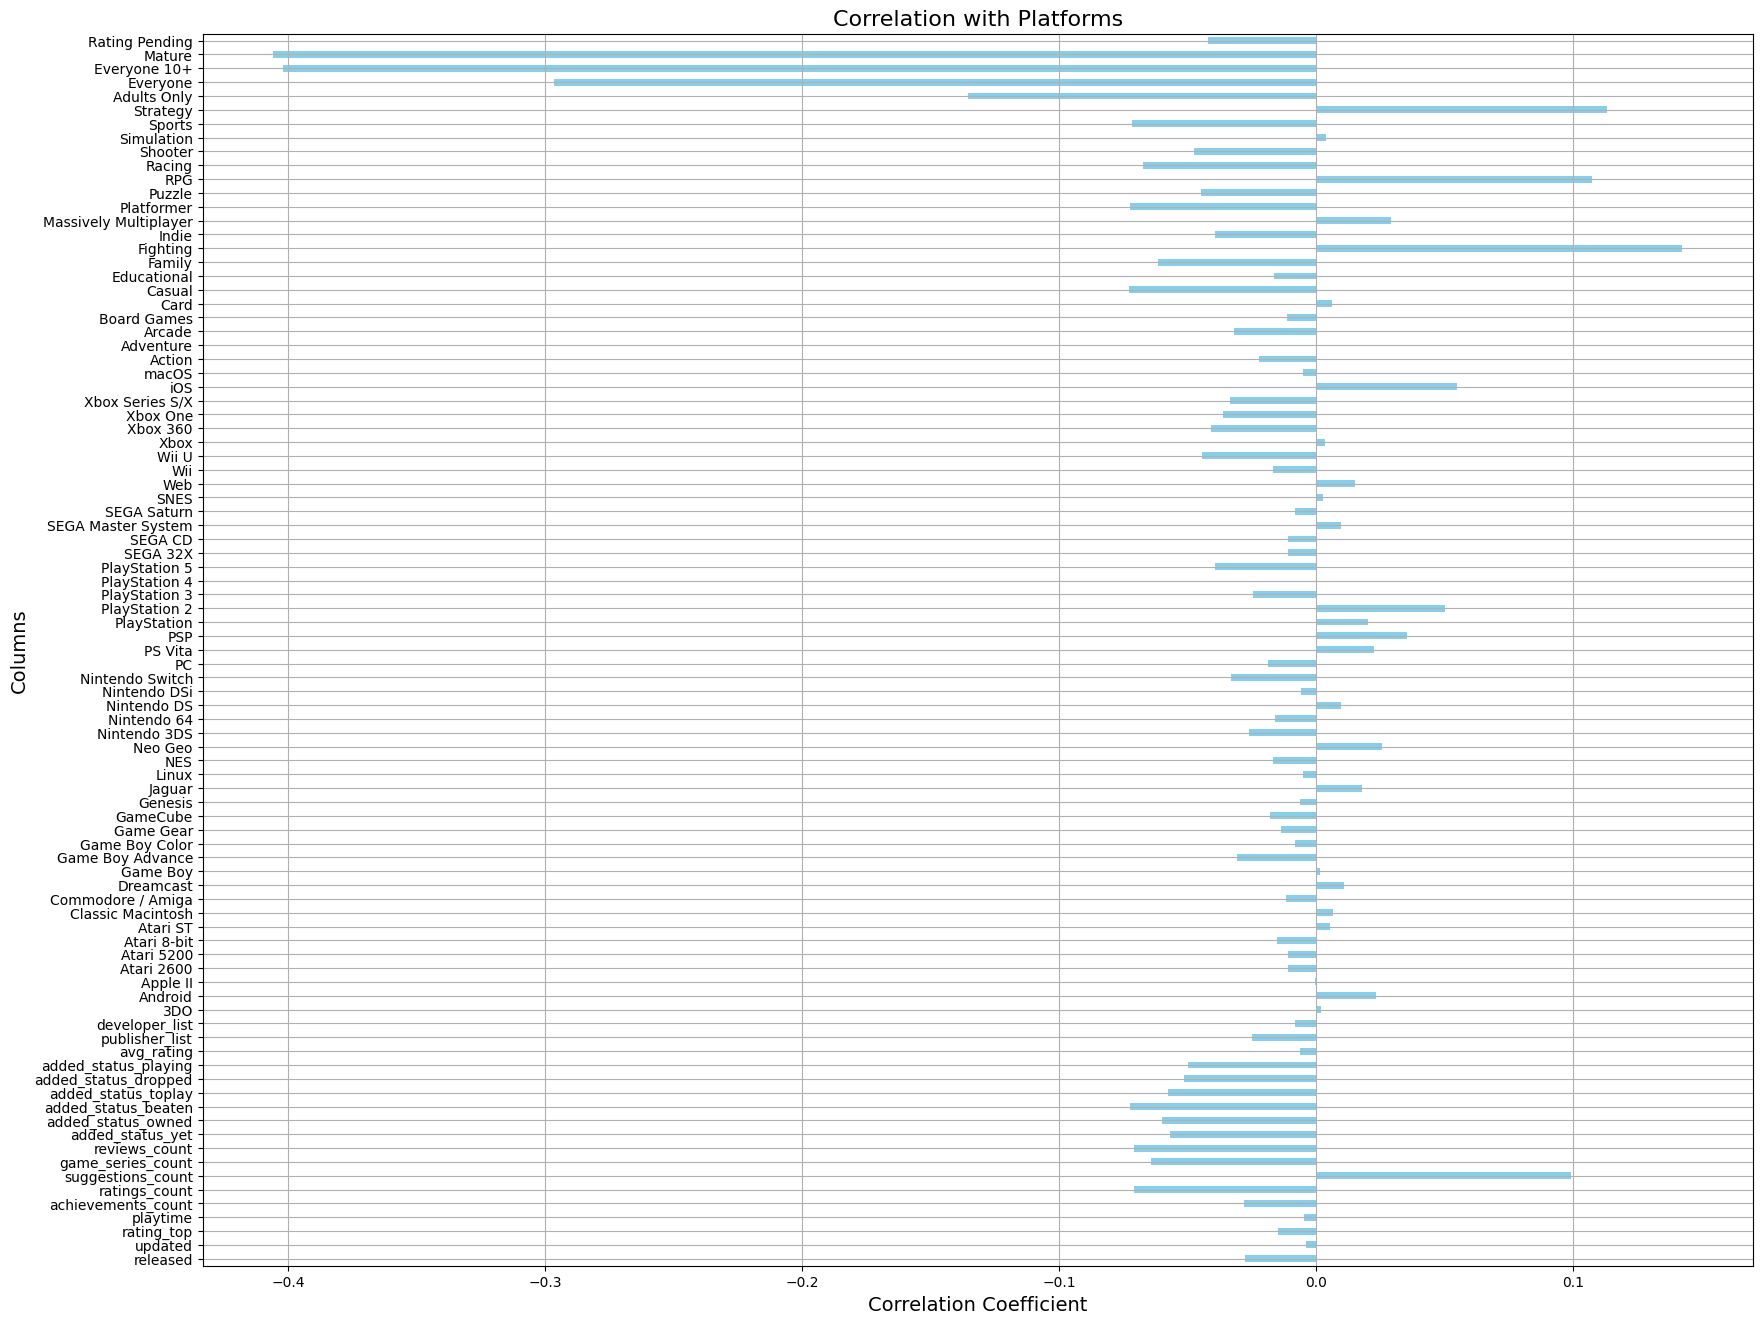

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

esrb_rating=esrb_rating.astype('float64')
# Concatenate the dataframes
df_corr = pd.concat([df_wiht_genres, esrb_rating], axis='columns', sort=False)

# Rename the last column to 'platforms'
df_corr = df_corr.rename(columns={ df_corr.columns[-1]: "esrb_rating" })

# Compute correlation with each column in df_cleaned_scaled
correlations = df_corr.corr()['esrb_rating']

# Drop the last item (which is the correlation of 'platforms' with itself)
correlations = correlations[:-1]

# Plotting
plt.figure(figsize=(20, 16))
correlations.plot(kind='barh', color='skyblue')
plt.title('Correlation with esrb_rating', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Columns', fontsize=14)
plt.grid(True)
plt.show()


# Drop low cor collumns

In [ ]:
df_wiht_genres=df_wiht_genres.drop(columns=['released','playtime','developer_list','publisher_list',])

In [ ]:
from sklearn.model_selection import train_test_split
X = df_wiht_genres
y = esrb_rating.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

model= MLPClassifier(solver='adam',max_iter=3000,learning_rate='adaptive',hidden_layer_sizes=(150,100,50,25,10,6),alpha=0.00001,activation='relu')
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)

cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

print(metrics.classification_report(expected_y, predicted_y))
print(cm)

Accuracy of MLPClassifier :  0.42777777777777776
              precision    recall  f1-score   support

           0       0.14      0.07      0.10        27
           1       0.40      0.46      0.43       130
           2       0.50      0.34      0.41       221
           3       0.52      0.49      0.50       231
           4       0.33      1.00      0.50         1
           5       0.46      0.45      0.45       290

   micro avg       0.46      0.43      0.44       900
   macro avg       0.39      0.47      0.40       900
weighted avg       0.46      0.43      0.44       900
 samples avg       0.42      0.43      0.42       900

[[  8   2   1   9   0   7]
 [ 13  60  21  12   1  23]
 [ 20  45  76  27   0  53]
 [ 33  14   8 114   0  62]
 [  0   1   0   0   0   0]
 [ 29  28  47  59   0 127]]


c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of  :  0.42777777777777776


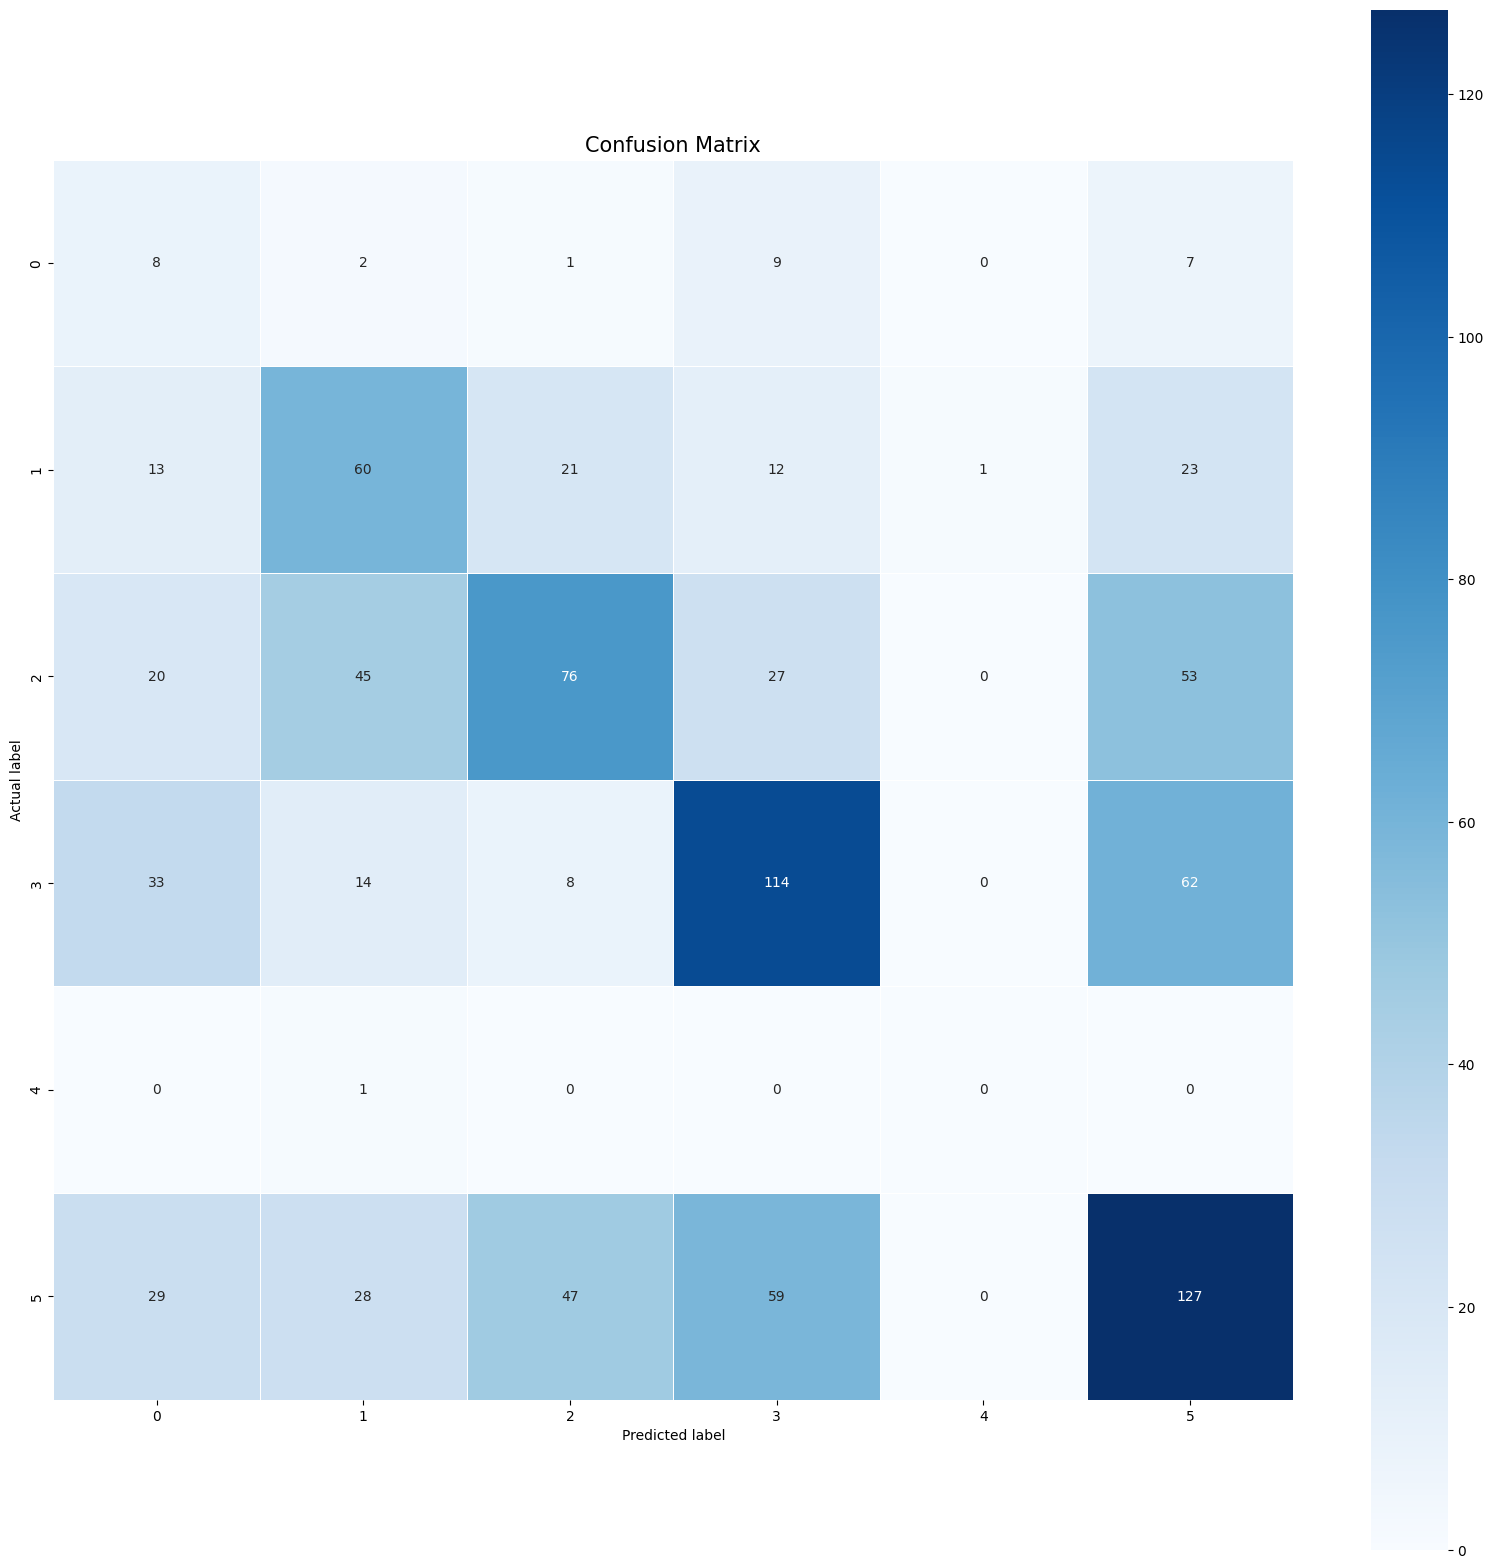

 clf score : 0.4177777777777778


In [ ]:
import seaborn as sns
predicted_y = model.predict(X_test)
cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))
#Printing the accuracy
print("Accuracy of  : ", accuracy(cm))

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

#print(metrics.classification_report(expected_y, predicted_y))
#print(cm)
score = model.score(X_test, y_test)
print(" clf score : "+str(score))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

def hyperparameter_tune(clf, parameters, iterations, X, y):
  randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=5) 
  randomSearch.fit(X,y)
  params = randomSearch.best_params_
  score = randomSearch.best_score_
  return params, score


params = {'hidden_layer_sizes': [(50),(50,50,50), (50,100,50), (100,),(500,50,),(1000,100,10,18),(150,50,150,50,20),(30,30,30,30,30),(1000,500,250,125,70,20),(30,30,30,)],
           'activation': ['tanh', 'relu','logistic','identity'],
           'solver': ['sgd', 'adam'],
           'alpha': [0.0001,0.001,0.005, 0.05,0.1,0.5,0.8],
           'learning_rate': ['invscaling','constant', 'adaptive'],
           'max_iter':[50,200,500,1000,2000,5000,10000,20000,40000],
           }

clf = MLPClassifier(verbose=True, early_stopping=True)


parameters_after_tuning, score_after_tuning = hyperparameter_tune(clf, params, 10, X_train, y_train);
print("parameters after tunning:")
print(parameters_after_tuning)
print("scores after tunning:")
print(score_after_tuning)

Iteration 1, loss = 3.36685002
Validation score: 0.219444
Iteration 2, loss = 2.60524102
Validation score: 0.066667
Iteration 3, loss = 2.32920420
Validation score: 0.175000
Iteration 4, loss = 2.24335224
Validation score: 0.094444
Iteration 5, loss = 2.18040252
Validation score: 0.144444
Iteration 6, loss = 2.12929455
Validation score: 0.188889
Iteration 7, loss = 2.06586305
Validation score: 0.288889
Iteration 8, loss = 2.00762077
Validation score: 0.286111
Iteration 9, loss = 1.94833523
Validation score: 0.311111
Iteration 10, loss = 1.89118705
Validation score: 0.313889
Iteration 11, loss = 1.85058609
Validation score: 0.369444
Iteration 12, loss = 1.82991780
Validation score: 0.322222
Iteration 13, loss = 1.80342968
Validation score: 0.341667
Iteration 14, loss = 1.76773297
Validation score: 0.350000
Iteration 15, loss = 1.72273130
Validation score: 0.355556
Iteration 16, loss = 1.71758137
Validation score: 0.358333
Iteration 17, loss = 1.67069721
Validation score: 0.386111
Iterat

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

model = MLPClassifier(solver='adam',max_iter=40000,learning_rate='invscaling',hidden_layer_sizes= (1000, 100, 10, 18,6),alpha=0.2,activation='relu')
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)

cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

print(metrics.classification_report(expected_y, predicted_y))
print(cm)

Accuracy of MLPClassifier :  0.43444444444444447
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.43      0.53      0.47       130
           2       0.41      0.43      0.42       221
           3       0.59      0.39      0.47       231
           4       0.00      0.00      0.00         1
           5       0.46      0.47      0.46       290

   micro avg       0.46      0.43      0.45       900
   macro avg       0.31      0.30      0.30       900
weighted avg       0.46      0.43      0.44       900
 samples avg       0.43      0.43      0.43       900

[[  6   2   2  14   0   3]
 [  8  69  34   5   0  14]
 [ 10  49  96   9   0  57]
 [ 27  12  22  89   0  81]
 [  0   1   0   0   0   0]
 [ 18  28  79  34   0 131]]


c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gydan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of  :  0.43444444444444447


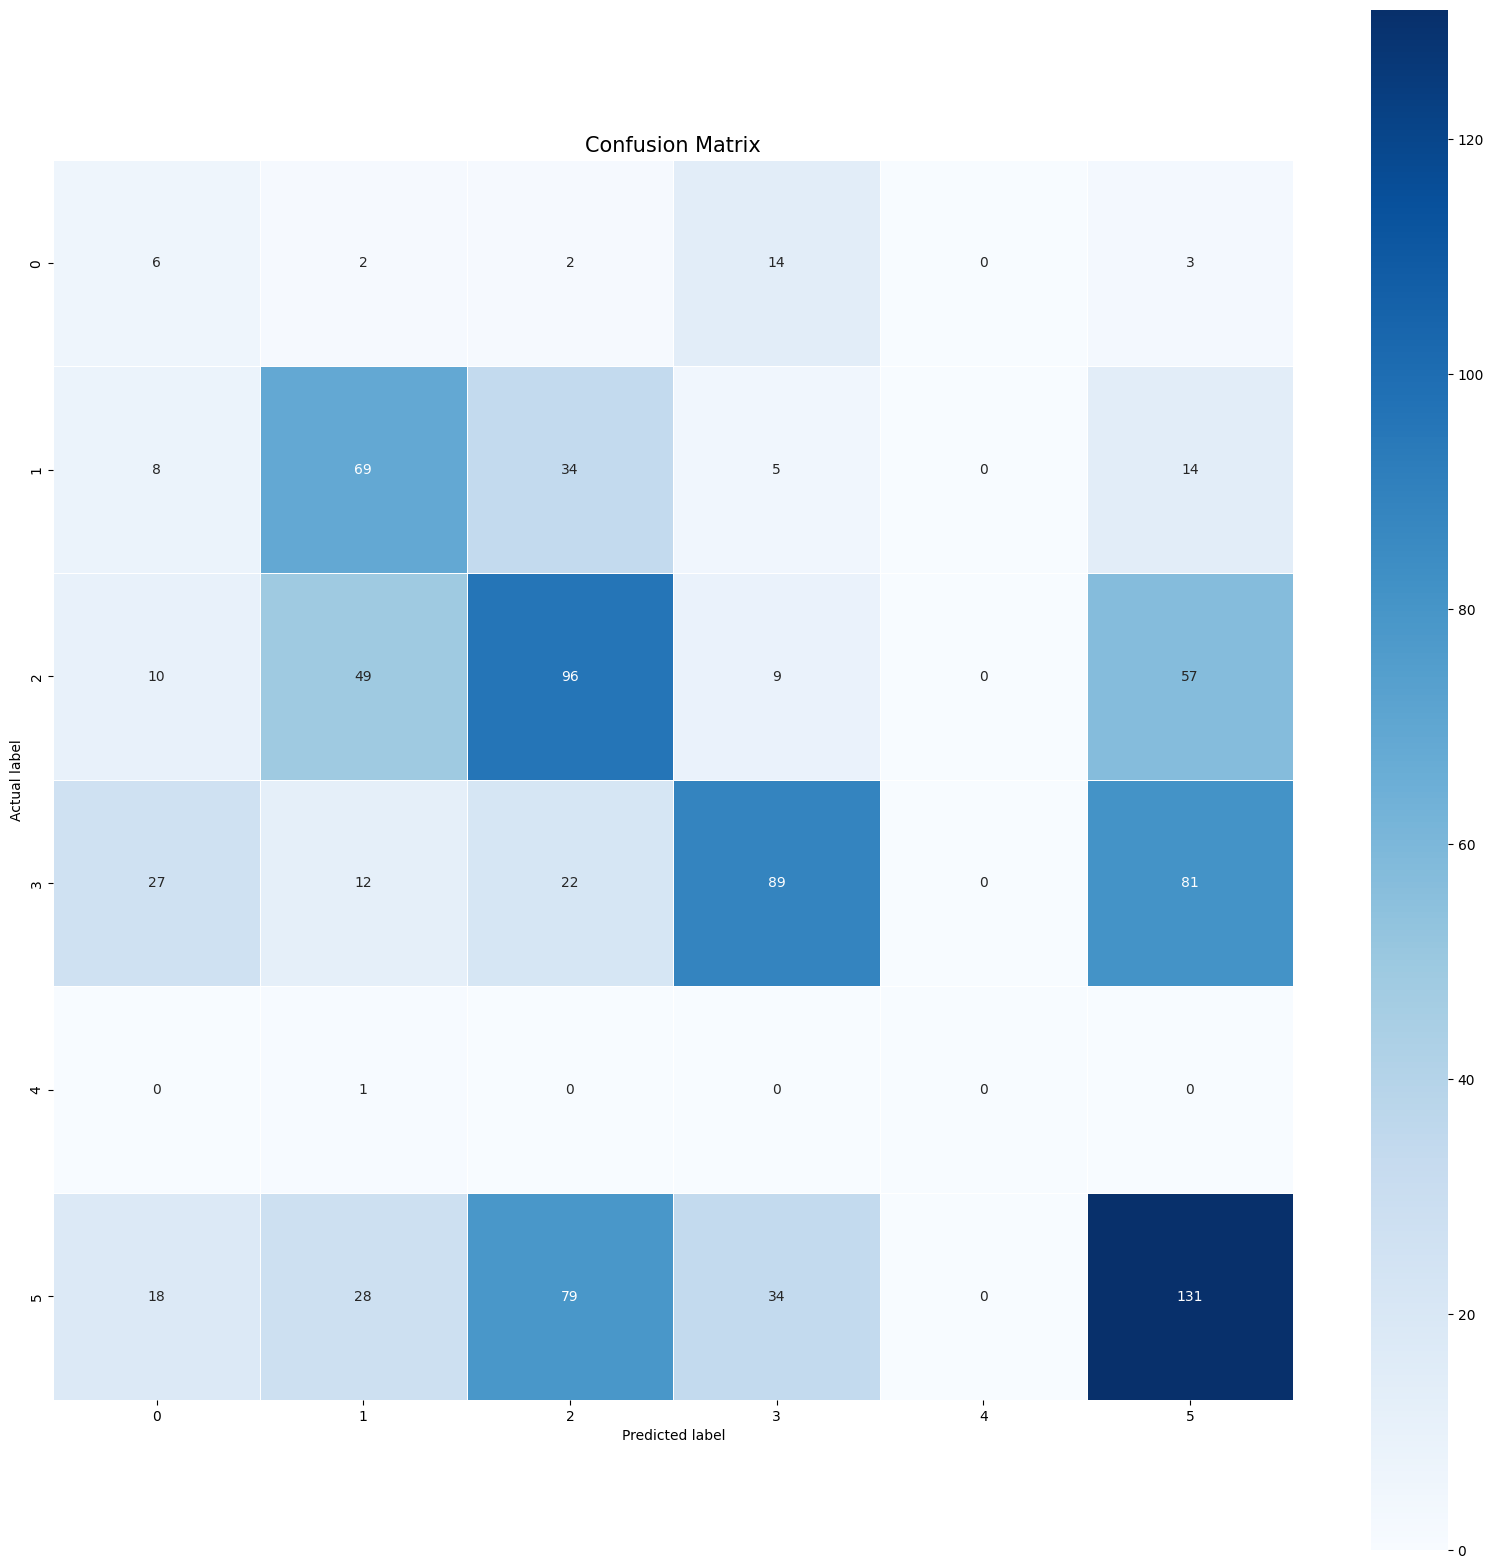

 clf score : 0.4222222222222222


In [ ]:
import seaborn as sns
predicted_y = model.predict(X_test)
cm = metrics.confusion_matrix(expected_y.values.argmax(axis=1), predicted_y.argmax(axis=1))
#Printing the accuracy
print("Accuracy of  : ", accuracy(cm))

# Create a heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

#print(metrics.classification_report(expected_y, predicted_y))
#print(cm)
score = model.score(X_test, y_test)
print(" clf score : "+str(score))